# CNN Playground

### Download data

In [1]:
# import zipfile

# # Download file zip hình ảnh pizza_steak
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Giải nén file đã tải
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [2]:
# # Lấy dữ liệu (10% nhãn)
# # Download dữ liệu
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# # Giải nén dữ liệu đã download 
# zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [3]:
# !brew install tree
!tree pizza_steak/train -d
    

pizza_steak/train
├── pizza
└── steak

2 directories


In [4]:
!tree pizza_steak/test -d

pizza_steak/test
├── pizza
└── steak

2 directories


In [5]:
import os

def count_files(dir):
    print(f"{dir} has {len(os.listdir(dir))} files")

train_path = 'pizza_steak/train'
test_path = 'pizza_steak/test'

count_files(train_path+'/pizza')
count_files(train_path+'/steak')
count_files(test_path+'/pizza')
count_files(test_path+'/steak')

pizza_steak/train/pizza has 750 files
pizza_steak/train/steak has 750 files
pizza_steak/test/pizza has 250 files
pizza_steak/test/steak has 250 files


In [6]:
# Tạo classname từ list dir
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [7]:
data_dir.glob('*')

<generator object Path.glob at 0x10bd05890>

In [8]:
for item in data_dir.glob('*'):
    print(item.name)

steak
pizza


In [9]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


### Visualization

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Get random image

In [11]:
def view_random_image(target_dir: str, target_class: str):
    target_folder = target_dir+'/'+target_class
    random_file_name = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+'/'+random_file_name[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img
    

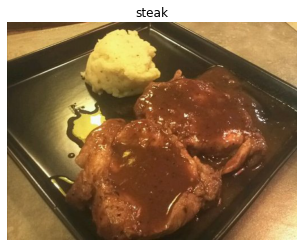

In [12]:
random_train_image = view_random_image(train_path, 'steak')

In [13]:
type(random_train_image)

numpy.ndarray

In [14]:
random_train_image.shape

(384, 512, 3)

### Baseline

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_data_gen.flow_from_directory(train_dir, 
                                                batch_size=32, 
                                                target_size=(224,224), 
                                                class_mode = "binary", 
                                                seed=42)
test_data = train_data_gen.flow_from_directory(test_dir, 
                                                batch_size=32, 
                                                target_size=(224,224), 
                                                class_mode = "binary", 
                                                seed=42)


/Users/ngohongthai/Documents/projects/tensorflow-env/env/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-13 14:32:04.965189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-13 14:32:04.965357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2022-10-13 14:32:05.648286: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-13 14:32:05.916714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.5644 - accuracy: 0.7127

2022-10-13 14:32:11.980843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 7s 101ms/step - loss: 0.5644 - accuracy: 0.7127 - val_loss: 0.4431 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 4s 91ms/step - loss: 0.4550 - accuracy: 0.7980 - val_loss: 0.3936 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4313 - accuracy: 0.8033 - val_loss: 0.3863 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4000 - accuracy: 0.8293 - val_loss: 0.3393 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 4s 89ms/step - loss: 0.3193 - accuracy: 0.8707 - val_loss: 0.3020 - val_accuracy: 0.8880


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#### Test mô hình đơn giản

In [18]:
model_2 = Sequential([
    Flatten(input_shape = (224,224,3)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5


2022-10-13 14:32:30.623737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.7144 - accuracy: 0.4953

2022-10-13 14:32:34.293720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 89ms/step - loss: 0.7144 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 88ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 87ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


#### Thử tăng độ phức tạp của mô hình bình thường, tăng số hidden layer cũng như tăng số nơ ron mỗi layer

In [20]:
tf.random.set_seed(42)
model_3 = Sequential([Flatten(input_shape=(224,224,3)),
                      Dense(100, activation='relu'),
                      Dense(100, activation='relu'),
                      Dense(100, activation='relu'),
                      Dense(1, activation='sigmoid')
                      ])
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5


2022-10-13 14:32:52.257973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 4.8710 - accuracy: 0.6153

2022-10-13 14:32:56.113424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 94ms/step - loss: 4.8710 - accuracy: 0.6153 - val_loss: 1.1666 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 4s 90ms/step - loss: 0.7520 - accuracy: 0.7127 - val_loss: 0.5730 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 4s 90ms/step - loss: 1.0567 - accuracy: 0.6727 - val_loss: 1.4428 - val_accuracy: 0.6560
Epoch 4/5
47/47 [==============================] - 4s 90ms/step - loss: 0.6144 - accuracy: 0.7533 - val_loss: 0.4716 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 4s 91ms/step - loss: 0.4822 - accuracy: 0.7887 - val_loss: 0.4514 - val_accuracy: 0.7820


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Chia nhỏ bài toán qua các bước

### 1. Tìm hiểu dữ liệu (trực quan hoá)

Nên trực quan hoá từ 10 đến 100 sample

In [22]:
!tree pizza_steak -d 

pizza_steak
├── test
│   ├── pizza
│   └── steak
└── train
    ├── pizza
    └── steak

6 directories


Text(0.5, 1.0, 'Pizza')

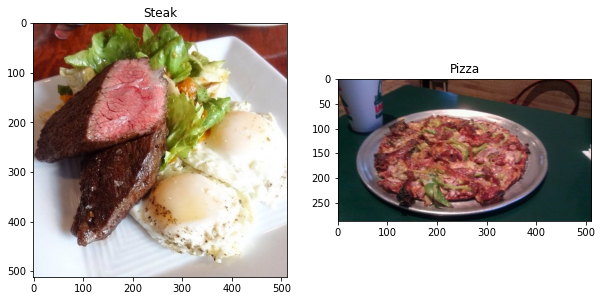

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
steak_path = 'pizza_steak/train/steak/'
pizza_path = 'pizza_steak/train/pizza/'
random_steak_name = random.sample(os.listdir(steak_path), 1)
random_pizza_name = random.sample(os.listdir(pizza_path), 1)
steak_image = mpimg.imread(steak_path+random_steak_name[0])
pizza_image = mpimg.imread(pizza_path+random_pizza_name[0])

axes[0].imshow(steak_image)
axes[0].set_title('Steak')
axes[1].imshow(pizza_image)
axes[1].set_title('Pizza')

### 2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)

Đầu ra cho quá trình này là train data, test data đã chia batch

In [24]:
!tree pizza_steak -d

pizza_steak
├── test
│   ├── pizza
│   └── steak
└── train
    ├── pizza
    └── steak

6 directories


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)


train_data = train_data_gen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                batch_size=32)
test_data = test_data_gen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32)
                                                

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Text(0.5, 1.0, '1.0')

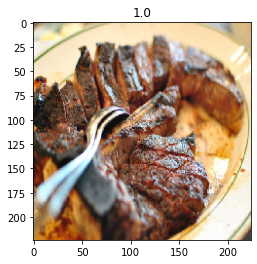

In [26]:
image, label = train_data.next()

plt.imshow(image[0])
plt.title(label[0])

### 3. Tạo mô hình (bắt đầu với baseline)

Nó tuân theo cấu trúc CNN điển hình của:

```
Input -> Conv + ReLU layers (non-linearities) X3 times  -> Fully connected (dense layer) as Output
```

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

### 4. Khớp mô hình

In [28]:
model_4.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data)
            )

Epoch 1/5


2022-10-13 14:33:15.879454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 2.2211 - accuracy: 0.5327

2022-10-13 14:33:19.537867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 94ms/step - loss: 2.2211 - accuracy: 0.5327 - val_loss: 0.6581 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 4s 88ms/step - loss: 0.6260 - accuracy: 0.5953 - val_loss: 0.5468 - val_accuracy: 0.6580
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.5437 - accuracy: 0.7013 - val_loss: 0.5184 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4928 - accuracy: 0.7407 - val_loss: 0.4767 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4500 - accuracy: 0.7987 - val_loss: 0.4118 - val_accuracy: 0.8420


### 5. Đánh giá mô hình

Training curve

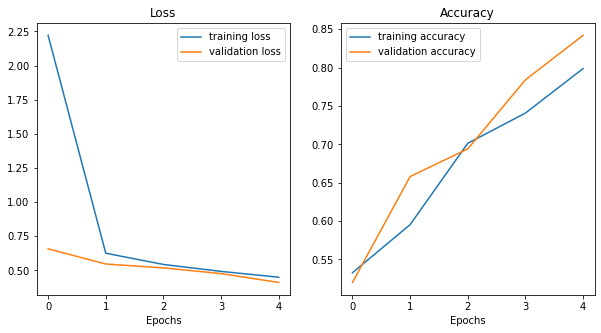

In [29]:
# plot history_4
import pandas as pd

def plot_history(history):
    training_loss = history.history['loss']
    training_acc = history.history['accuracy']
    
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.plot(epochs, training_loss, label='training loss')
    ax1.plot(epochs, val_loss, label='validation loss')
    ax1.set_title('Loss')
    ax1.legend()
    ax1.set_xlabel('Epochs')
    
    ax2.plot(epochs, training_acc, label='training accuracy')
    ax2.plot(epochs, val_acc, label='validation accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    ax2.set_xlabel('Epochs')
    
plot_history(history_4)
    

In [30]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Đánh giá các tham số khác nhau và cải thiện mô hình, vượt lên baseline

Mô hình đang bị overfiting, giờ cần cải thiện giảm overfit.

- Dùng max pooling
- Dùng max pooling và data augmentation

In [31]:
# Mô hình sẽ giống với mô hình số 4 nhưng sẽ thêm MaxPool2D vào

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5


2022-10-13 14:33:37.940921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6569 - accuracy: 0.5773

2022-10-13 14:33:41.607961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 91ms/step - loss: 0.6569 - accuracy: 0.5773 - val_loss: 0.5943 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 4s 88ms/step - loss: 0.5307 - accuracy: 0.7453 - val_loss: 0.4453 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4521 - accuracy: 0.7787 - val_loss: 0.3746 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4203 - accuracy: 0.8160 - val_loss: 0.3543 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 4s 88ms/step - loss: 0.3801 - accuracy: 0.8333 - val_loss: 0.3117 - val_accuracy: 0.8700


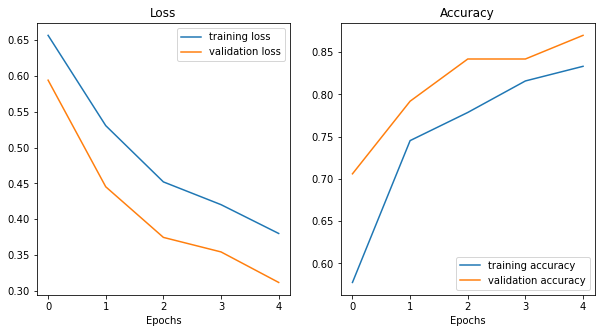

In [32]:
plot_history(history_5)

In [33]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Thử Tăng cường dữ liệu

In [34]:
# Tạo ImageDataGenerator training instance với data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # xoay hình một chút trong khoảng 0-20 độ (lưu ý: đây là int, không phải float)
                                             shear_range=0.2, # cắt ảnh
                                             zoom_range=0.2, # phóng to ảnh
                                             width_shift_range=0.2, # dịch chuyển ảnh theo chiều rộng
                                             height_shift_range=0.2, # dịch chuyển ảnh theo chiều cao
                                             horizontal_flip=True) # lật ảnh trên trục hoành

# Tạo ImageDataGenerator training instance mà không có data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Tạo ImageDataGenerator test instance mà không có data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [35]:
# Import dữ liệu và tăng cường nó từ training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Không xáo trộn cho mục đích mô phỏng

# Tạo các non-augmented data batch
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Không xáo trộn cho mục đích mô phỏng

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


### 7. Lặp lại cho đến khi thoả mãn